# Pandas 

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Object Creation
Creating a `Series` by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a `DataFrame` by passing a NumPy array, with a datetime index and labeled columns:

In [2]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [3]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.444932,0.208510,-1.075920,1.412243
2013-01-02,0.911945,2.148994,-0.451785,0.706996
2013-01-03,0.108535,-0.093151,0.685433,0.114805
2013-01-04,-0.625487,0.943332,0.066840,0.957569
2013-01-05,-1.216114,-0.327309,0.644184,-1.703872
2013-01-06,-1.112235,0.046649,0.298916,1.070604


Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.

In [4]:
df2 = pd.DataFrame({'A': 1.,'B': pd.Timestamp('20130102'),
         'C': pd.Series(1, index=list(range(4)), dtype='float32'),
         'D': np.array([3] * 4, dtype='int32'),
         'E': pd.Categorical(["test", "train", "test", "train"]),
         'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [5]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data
Here is how to view the top and bottom rows of the frame:

In [6]:
df.head()

,A,B,C,D
2013-01-01,1.444932,0.208510,-1.075920,1.412243
2013-01-02,0.911945,2.148994,-0.451785,0.706996
2013-01-03,0.108535,-0.093151,0.685433,0.114805
2013-01-04,-0.625487,0.943332,0.066840,0.957569
2013-01-05,-1.216114,-0.327309,0.644184,-1.703872


In [7]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.625487,0.943332,0.066840,0.957569
2013-01-05,-1.216114,-0.327309,0.644184,-1.703872
2013-01-06,-1.112235,0.046649,0.298916,1.070604


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`describe()` shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.081404,0.487838,0.027945,0.426391
std,1.095329,0.921043,0.683467,1.129859
min,-1.216114,-0.327309,-1.075920,-1.703872
25%,-0.990548,-0.058201,-0.322129,0.262853
50%,-0.258476,0.127580,0.182878,0.832283
75%,0.711092,0.759627,0.557867,1.042345
max,1.444932,2.148994,0.685433,1.412243


Transposing your data:

In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.444932,0.911945,0.108535,-0.625487,-1.216114,-1.112235
B,0.208510,2.148994,-0.093151,0.943332,-0.327309,0.046649
C,-1.075920,-0.451785,0.685433,0.066840,0.644184,0.298916
D,1.412243,0.706996,0.114805,0.957569,-1.703872,1.070604


Sorting by an axis:

In [15]:
df.sort_index(axis=1, ascending=True)

,A,B,C,D
2013-01-01,1.444932,0.208510,-1.075920,1.412243
2013-01-02,0.911945,2.148994,-0.451785,0.706996
2013-01-03,0.108535,-0.093151,0.685433,0.114805
2013-01-04,-0.625487,0.943332,0.066840,0.957569
2013-01-05,-1.216114,-0.327309,0.644184,-1.703872
2013-01-06,-1.112235,0.046649,0.298916,1.070604


Sorting by values:


In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.576728,-1.951616,-0.661435,-1.095980
2013-01-02,-0.448904,-1.317732,0.567434,0.350116
2013-01-01,-1.144182,-1.161072,-0.829557,0.488064
2013-01-06,-0.677359,-0.438768,-1.072569,-1.381580
2013-01-04,-1.402584,0.059513,1.048392,-1.399132
2013-01-03,0.026966,0.487039,0.355740,-0.852359


## Selection
### Getting
Selecting a single column, which yields a Series, equivalent to `df.A`:

In [16]:
df['A']


2013-01-01    1.444932
2013-01-02    0.911945
2013-01-03    0.108535
2013-01-04   -0.625487
2013-01-05   -1.216114
2013-01-06   -1.112235
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [13]:
 df[0:3]


,A,B,C,D
2013-01-01,-2.325177,1.008653,1.149415,-1.607832
2013-01-02,-0.355051,-0.174378,0.881314,-0.214722
2013-01-03,0.905000,-0.745324,-0.555194,-0.586280


In [17]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.911945,2.148994,-0.451785,0.706996
2013-01-03,0.108535,-0.093151,0.685433,0.114805
2013-01-04,-0.625487,0.943332,0.066840,0.957569


### Selection by Label
For getting a cross section using a label:

In [18]:
df.loc[dates[0]]

A    1.444932
B    0.208510
C   -1.075920
D    1.412243
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:


In [19]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.444932,0.208510
2013-01-02,0.911945,2.148994
2013-01-03,0.108535,-0.093151
2013-01-04,-0.625487,0.943332
2013-01-05,-1.216114,-0.327309
2013-01-06,-1.112235,0.046649


Showing label slicing, both endpoints are included:

In [20]:
df.loc['20130102':'20130104', ['A', 'B']]


,A,B
2013-01-02,0.911945,2.148994
2013-01-03,0.108535,-0.093151
2013-01-04,-0.625487,0.943332


Reduction in the dimensions of the returned object:


In [21]:
df.loc['20130102', ['A', 'B']]


A    0.911945
B    2.148994
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [22]:
df.loc[dates[0], 'A']


1.444931638010701

For getting fast access to a scalar (equivalent to the prior method):

In [27]:
df.at[dates[0], 'A']


-1.1441823649210852

### Selection by Position
Select via the position of the passed integers:

In [23]:
df

,A,B,C,D
2013-01-01,1.444932,0.208510,-1.075920,1.412243
2013-01-02,0.911945,2.148994,-0.451785,0.706996
2013-01-03,0.108535,-0.093151,0.685433,0.114805
2013-01-04,-0.625487,0.943332,0.066840,0.957569
2013-01-05,-1.216114,-0.327309,0.644184,-1.703872
2013-01-06,-1.112235,0.046649,0.298916,1.070604


In [24]:
df.iloc[3]

A   -0.625487
B    0.943332
C    0.066840
D    0.957569
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to `numpy`:

In [25]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.625487,0.943332
2013-01-05,-1.216114,-0.327309


For slicing rows explicitly:

In [26]:
df.iloc[1:3, :]


,A,B,C,D
2013-01-02,0.911945,2.148994,-0.451785,0.706996
2013-01-03,0.108535,-0.093151,0.685433,0.114805


For slicing columns explicitly:

In [27]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.208510,-1.075920
2013-01-02,2.148994,-0.451785
2013-01-03,-0.093151,0.685433
2013-01-04,0.943332,0.066840
2013-01-05,-0.327309,0.644184
2013-01-06,0.046649,0.298916


### Boolean Indexing
Using a single column’s values to select data.

In [28]:
df

,A,B,C,D
2013-01-01,1.444932,0.208510,-1.075920,1.412243
2013-01-02,0.911945,2.148994,-0.451785,0.706996
2013-01-03,0.108535,-0.093151,0.685433,0.114805
2013-01-04,-0.625487,0.943332,0.066840,0.957569
2013-01-05,-1.216114,-0.327309,0.644184,-1.703872
2013-01-06,-1.112235,0.046649,0.298916,1.070604


In [30]:
df[df.A > 0]


,A,B,C,D
2013-01-01,1.444932,0.208510,-1.075920,1.412243
2013-01-02,0.911945,2.148994,-0.451785,0.706996
2013-01-03,0.108535,-0.093151,0.685433,0.114805


Selecting values from a DataFrame where a boolean condition is met.

In [31]:
df[df > 0]

,A,B,C,D
2013-01-01,1.444932,0.208510,NaN,1.412243
2013-01-02,0.911945,2.148994,NaN,0.706996
2013-01-03,0.108535,NaN,0.685433,0.114805
2013-01-04,NaN,0.943332,0.066840,0.957569
2013-01-05,NaN,NaN,0.644184,NaN
2013-01-06,NaN,0.046649,0.298916,1.070604


Using the `isin()` method for filtering:

In [33]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,1.444932,0.208510,-1.075920,1.412243,one
2013-01-02,0.911945,2.148994,-0.451785,0.706996,one
2013-01-03,0.108535,-0.093151,0.685433,0.114805,two
2013-01-04,-0.625487,0.943332,0.066840,0.957569,three
2013-01-05,-1.216114,-0.327309,0.644184,-1.703872,four
2013-01-06,-1.112235,0.046649,0.298916,1.070604,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]
#print(df2['E'].isin(['two', 'four']))

,A,B,C,D,E
2013-01-03,0.108535,-0.093151,0.685433,0.114805,two
2013-01-05,-1.216114,-0.327309,0.644184,-1.703872,four


### Setting


In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], 
               index=pd.date_range('20130102', periods=6))
df['F'] = s1
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df

,A,B,C,D,F
2013-01-01,1.444932,0.208510,-1.075920,1.412243,NaN
2013-01-02,0.911945,2.148994,-0.451785,0.706996,1.0
2013-01-03,0.108535,-0.093151,0.685433,0.114805,2.0
2013-01-04,-0.625487,0.943332,0.066840,0.957569,3.0
2013-01-05,-1.216114,-0.327309,0.644184,-1.703872,4.0
2013-01-06,-1.112235,0.046649,0.298916,1.070604,5.0


Setting values by label or position:

In [38]:
df.at[dates[0], 'A'] = 0
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:


In [39]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.075920,5,NaN
2013-01-02,0.911945,2.148994,-0.451785,5,1.0
2013-01-03,0.108535,-0.093151,0.685433,5,2.0
2013-01-04,-0.625487,0.943332,0.066840,5,3.0
2013-01-05,-1.216114,-0.327309,0.644184,5,4.0
2013-01-06,-1.112235,0.046649,0.298916,5,5.0


A `where` operation with setting.

In [40]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.075920,-5,NaN
2013-01-02,-0.911945,-2.148994,-0.451785,-5,-1.0
2013-01-03,-0.108535,-0.093151,-0.685433,-5,-2.0
2013-01-04,-0.625487,-0.943332,-0.066840,-5,-3.0
2013-01-05,-1.216114,-0.327309,-0.644184,-5,-4.0
2013-01-06,-1.112235,-0.046649,-0.298916,-5,-5.0


### Missing Data
pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.


In [41]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.075920,5,NaN,1.0
2013-01-02,0.911945,2.148994,-0.451785,5,1.0,1.0
2013-01-03,0.108535,-0.093151,0.685433,5,2.0,NaN
2013-01-04,-0.625487,0.943332,0.066840,5,3.0,NaN


To drop any rows that have missing data.

In [25]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.355051,-0.174378,0.881314,-0.214722,1.0,1.0


In [26]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.149415,-1.607832,NaN,1.0
2013-01-02,-0.355051,-0.174378,0.881314,-0.214722,1.0,1.0
2013-01-03,0.905000,-0.745324,-0.555194,-0.586280,2.0,NaN
2013-01-04,-0.533636,1.127044,0.192458,1.507777,3.0,NaN


Filling missing data.

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.829557,5,5.0,1.0
2013-01-02,-0.448904,-1.317732,0.567434,5,1.0,1.0
2013-01-03,0.026966,0.487039,0.355740,5,2.0,5.0
2013-01-04,-1.402584,0.059513,1.048392,5,3.0,5.0


To get the boolean mask where values are `nan`.

In [47]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
### Statistics
Operations in general exclude missing data.
Performing a descriptive statistic:

In [47]:
df.mean(axis=0)


A   -0.322226
B    0.453086
C    0.027945
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [49]:
df.skew(axis=1)


2013-01-01    1.786047
2013-01-02    1.164896
2013-01-03    1.512909
2013-01-04    0.758039
2013-01-05    0.427757
2013-01-06    0.452865
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [50]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.891465,-1.093151,-0.314567,4.0,1.0
2013-01-04,-3.625487,-2.056668,-2.933160,2.0,0.0
2013-01-05,-6.216114,-5.327309,-4.355816,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data:


In [52]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.075920,5,NaN
2013-01-02,0.911945,2.148994,-0.451785,5,1.0
2013-01-03,0.108535,-0.093151,0.685433,5,2.0
2013-01-04,-0.625487,0.943332,0.066840,5,3.0
2013-01-05,-1.216114,-0.327309,0.644184,5,4.0
2013-01-06,-1.112235,0.046649,0.298916,5,5.0


In [28]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.149415,-1.607832,NaN
2013-01-02,-0.355051,-0.174378,2.030729,-1.822554,1.0
2013-01-03,0.549949,-0.919703,1.475535,-2.408834,3.0
2013-01-04,0.016313,0.207341,1.667993,-0.901057,6.0
2013-01-05,0.771727,0.694814,0.446750,-0.809650,10.0
2013-01-06,-0.995788,1.188431,-0.747811,-0.506330,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    2.128059
B    2.476302
C    1.761353
D    0.000000
F    4.000000
dtype: float64

## Merge
### Concat

pandas provides various facilities for easily combining together `Series`, `DataFrame`, and `Panel` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with `concat()`:

In [54]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.020322,-1.647304,0.686068,-0.591397
1,-1.076051,-0.355370,0.014584,-1.192149
2,-1.172077,-1.220991,-1.621640,-0.262364
3,-0.683304,-0.081303,-0.282660,0.733486
4,-0.928665,-0.886455,0.729707,0.836615
5,-0.337388,0.330788,-0.443130,0.046757
6,-0.775098,0.491631,-0.610817,1.122059
7,0.204340,0.238214,-0.783711,0.142263
8,0.732348,-0.912672,-0.485533,-0.325944
9,-0.227106,0.361300,-0.184358,-0.445741


In [57]:
pieces = [df[3:7],df[:3], df[7:]]

In [58]:
pd.concat(pieces)

,0,1,2,3
3,-0.683304,-0.081303,-0.282660,0.733486
4,-0.928665,-0.886455,0.729707,0.836615
5,-0.337388,0.330788,-0.443130,0.046757
6,-0.775098,0.491631,-0.610817,1.122059
0,-0.020322,-1.647304,0.686068,-0.591397
1,-1.076051,-0.355370,0.014584,-1.192149
2,-1.172077,-1.220991,-1.621640,-0.262364
7,0.204340,0.238214,-0.783711,0.142263
8,0.732348,-0.912672,-0.485533,-0.325944
9,-0.227106,0.361300,-0.184358,-0.445741


### Join
Same key:

In [59]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [60]:
right

,key,rval
0,foo,4
1,foo,5


In [59]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Different keys:

In [61]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [62]:
right

,key,rval
0,foo,4
1,bar,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append


In [64]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.015001,-1.627100,-0.203716,-0.125106
1,0.653803,1.228713,0.545035,1.338513
2,-1.609646,-0.032215,0.978334,0.931614
3,0.921313,0.032371,-0.834690,0.973628
4,-0.039855,0.288197,-0.880348,0.333460
5,0.130837,1.764277,0.907469,1.368700
6,0.102498,0.064848,-1.948158,1.362374
7,1.565050,1.714132,-0.379545,1.264923


In [67]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.867946,-0.523610,0.321592,-1.904082
1,-0.177768,1.232457,-0.429720,0.656572
2,-0.973636,0.602581,1.184729,1.072298
3,-0.029753,0.838946,-0.198997,-0.097168
4,1.482655,0.629392,0.563975,-0.426862
5,1.115576,-1.411806,0.274723,0.930671
6,0.406253,-0.202268,1.714482,-0.188965
7,0.695603,1.018511,1.086512,-0.820871
8,-0.029753,0.838946,-0.198997,-0.097168


### Grouping
By “group by” we are referring to a process involving one or more of the following steps:
+ Splitting the data into groups based on some criteria
+ Applying a function to each group independently
+ Combining the results into a data structure

In [65]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df


,A,B,C,D
0,foo,one,0.258283,1.242711
1,bar,one,-0.063028,-0.687863
2,foo,two,-0.108203,0.008145
3,bar,three,-0.957080,-0.094105
4,foo,two,-0.055852,0.141967
5,bar,two,0.167057,1.270186
6,foo,one,-0.892681,0.018624
7,foo,three,-0.733185,0.898655


Grouping and then applying the `sum()` function to the resulting groups.

In [66]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.853051,0.488218
foo,-1.531637,2.310102


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum` function.

In [67]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.063028 -0.687863
    three -0.957080 -0.094105
    two    0.167057  1.270186
foo one   -0.634398  1.261335
    three -0.733185  0.898655
    two   -0.164055  0.150112

## Reshaping
### stack

In [68]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.189736  1.122015
      two     0.165512 -0.217958
baz   one    -0.376402  0.266781
      two    -0.359416 -0.583077

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [69]:
stacked = df2.stack()
stacked


first  second   
bar    one     A   -0.189736
               B    1.122015
       two     A    0.165512
               B   -0.217958
baz    one     A   -0.376402
               B    0.266781
       two     A   -0.359416
               B   -0.583077
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is `unstack()`, which by default unstacks the last level:

In [70]:
stacked.unstack()

A         B
first second                    
bar   one    -0.189736  1.122015
      two     0.165512 -0.217958
baz   one    -0.376402  0.266781
      two    -0.359416 -0.583077

In [71]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.189736  0.165512
      B  1.122015 -0.217958
baz   A -0.376402 -0.359416
      B  0.266781 -0.583077

In [72]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.189736 -0.376402
       B  1.122015  0.266781
two    A  0.165512 -0.359416
       B -0.217958 -0.583077

### Pivot Tables


In [73]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.038473,0.553336
1,one,B,foo,-0.725844,0.155874
2,two,C,foo,1.893660,1.021215
3,three,A,bar,0.218818,0.636798
4,one,B,bar,-0.350099,-2.258764
5,one,C,bar,-0.326734,-0.129418
6,two,A,foo,1.500934,-0.433974
7,three,B,foo,-1.490491,-1.155977
8,one,C,foo,-1.436460,0.076382
9,one,A,bar,-0.229401,0.039473


We can produce pivot tables from this data very easily:

In [74]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.229401  0.038473
      B -0.350099 -0.725844
      C -0.326734 -1.436460
three A  0.218818       NaN
      B       NaN -1.490491
      C  1.886522       NaN
two   A       NaN  1.500934
      B  0.988301       NaN
      C       NaN  1.893660

## Plotting

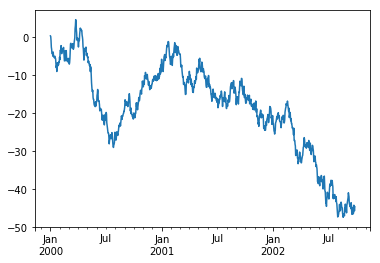

In [76]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

<Figure size 432x288 with 0 Axes>

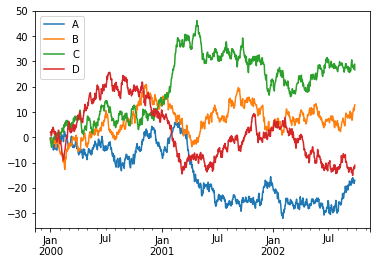

In [77]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')


## Getting Data In/Out
### CSV
Writing to a csv file

In [78]:
df.to_csv('foo.csv')

Reading from a csv file.

In [89]:
df3=pd.read_csv('foo.csv')
df3.index=df3.iloc[:,0]
df3.index[0:3]

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object', name='Unnamed: 0')

In [2]:
import pandas as pd
Data = pd.read_csv('boston.csv')
Data.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
17000*0.15

2550.0